In [70]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve, convolve1d
from skimage import measure
from sympy import Matrix, symbols
import cv2

ModuleNotFoundError: No module named 'cv2'

In [108]:
img = plt.imread('masked_image.png')

Discrete differentiation operator:
[1, 0, -1]
We will compute a convolution with this kernel.

In [33]:
def show_matrix(image):
    m = Matrix(image)
    display(m)

In [59]:
checkboard = np.array([[0, 1], [1, 0]])
checkboard = np.kron(checkboard, np.ones((10,10)))
# show_matrix(checkboard)

Text(0.5, 1.0, 'Dy')

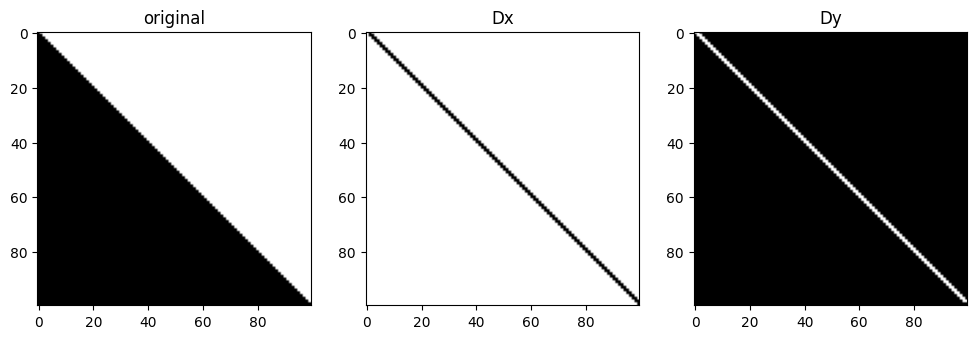

In [ ]:
Dx = np.array([1, 0, -1], np.float32).reshape((3,1))
Dy = np.array([1, 0, -1], np.float32).reshape((1,3))
checkboard_x_c = convolve(checkboard, Dx)
checkboard_y_c = convolve(checkboard, Dy)
fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,3,1)
plt.imshow(checkboard, cmap='gray')
plt.title("original")
fig.add_subplot(1,3,2)
plt.imshow(checkboard_x_c, cmap='gray')
plt.title("Dx")
fig.add_subplot(1,3,3)
plt.imshow(checkboard_y_c, cmap='gray')
plt.title("Dy")


In [48]:
upper_tri = np.triu(np.ones((100,100)), 1)


In [35]:
show_matrix(Dx)

Matrix([
[ 1.0],
[   0],
[-1.0]])

In [16]:
checkboard_x_c

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
checkboard_y_c

array([[ 0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0.,  0.]])

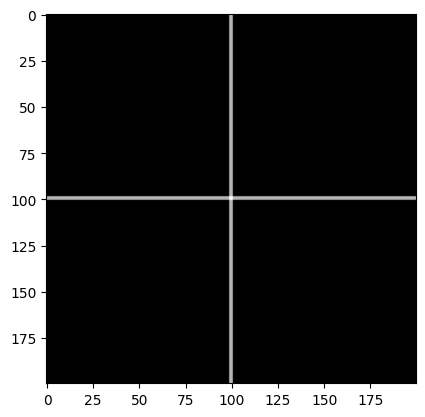

In [43]:
diff_img, theta = custom_kernel(checkboard, Dx, Dy)
plt.imshow(diff_img, cmap='gray')

In [24]:
diff_img

array([[0.        , 0.        , 0.70710678, 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.        , 0.70710678, 0.70710678, 0.        ,
        0.        ],
       [0.70710678, 0.70710678, 1.        , 1.        , 0.70710678,
        0.70710678],
       [0.70710678, 0.70710678, 1.        , 1.        , 0.70710678,
        0.70710678],
       [0.        , 0.        , 0.70710678, 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.        , 0.70710678, 0.70710678, 0.        ,
        0.        ]])

Text(0.5, 1.0, 'Dy')

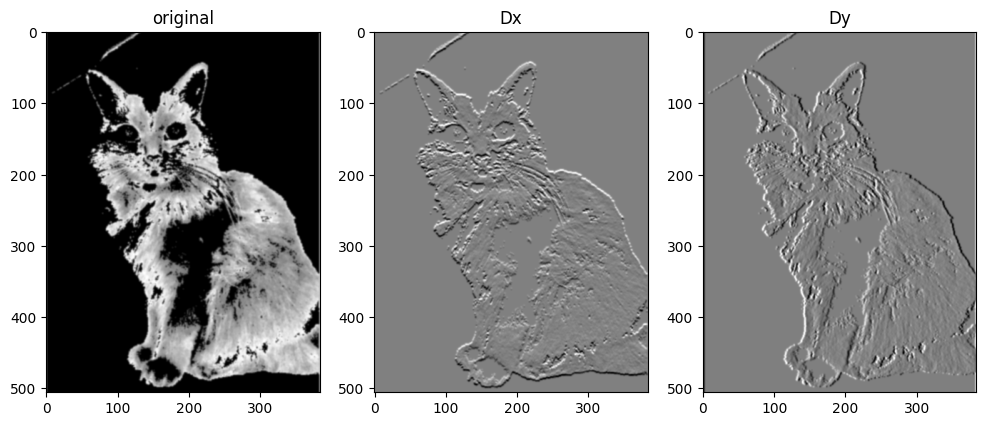

In [ ]:
Dx = np.array([1, 0, -1], np.float32).reshape((3,1))
Dy = np.array([1, 0, -1], np.float32).reshape((1,3))

img_grayscale = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

img_Dx = convolve(img_grayscale,Dx)
img_Dy = convolve(img_grayscale,Dy)

# draw images
fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("original")
fig.add_subplot(1,3,2)
plt.imshow(img_Dx, cmap='gray')
plt.title("Dx")
fig.add_subplot(1,3,3)
plt.imshow(img_Dy, cmap='gray')
plt.title("Dy")

### Now let's enhance the convolution, and incorporate both vertical and horizontal kernels!

In [22]:
def custom_kernel(img, Kx, Ky, alpha=1):
    ''' input: a gray scale image
       output: the gray scale edge detection image, and direction matrix theta'''
    # convolution in both directions
    Ix = convolve(img, alpha * Kx)
    Iy = convolve(img, alpha * Ky)

    # calculate the gradient magnitude and direction
    G = np.hypot(Ix, Iy)
    G = G / G.max()
    theta = np.arctan2(Iy, Ix)

    # return combined matrix and angle at which the gradient occurs
    # question: what is the significance of the angle?
    # answer: the angle indicates the direction of the edge in the image
    # the gradient direction is perpendicular to the edge direction
    # the gradient magnitude indicates the strength of the edge
    # the gradient direction can be used for edge tracking and thinning
    return (G, theta)

Using discrete differential opperator

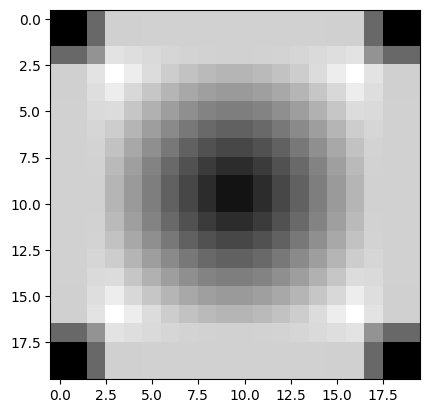

In [66]:
Dx = np.array([1,0, -1], np.float32).reshape((3,1))
Dy = np.array([1, 0, -1], np.float32).reshape((1,3))

diff_img, theta = custom_kernel(checkboard_gauss, Dx, Dy)
plt.imshow(diff_img, cmap='gray')

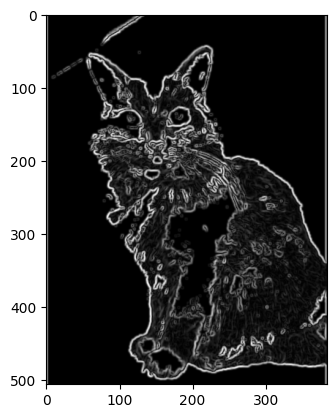

In [112]:
Px = np.array([[1, 1, 1], 
               [0, 0, 0], 
               [-1, -1, -1]], np.float32)
Py = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], np.float32)
prewitt_img, theta = custom_kernel(img_grayscale, Px, Py)
plt.imshow(prewitt_img, cmap='gray')

SOBEL FILTER

In [44]:
Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
Ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)

In [39]:
show_matrix(Kx)

Matrix([
[-1.0, 0, 1.0],
[-2.0, 0, 2.0],
[-1.0, 0, 1.0]])

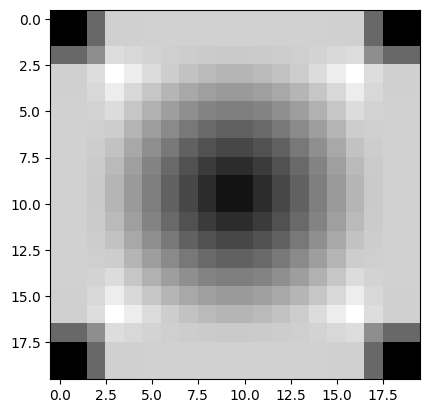

In [65]:

sobel_img, theta = custom_kernel(checkboard_gauss, Kx, Ky)
plt.imshow(sobel_img, cmap='gray')

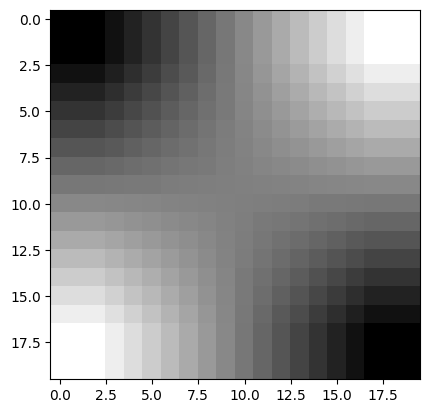

In [63]:
# creates a kernel of size kernel_size. the bigger the kernel size, the more nearby pixels are taken
# into account. bigger kernel size = more blurring
def gaussian_kernel(kernel_size, sigma=1):
    size = int(kernel_size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

checkboard_gauss = convolve(checkboard, gaussian_kernel(15, 110))
plt.imshow(checkboard_gauss, cmap='gray')


In [115]:
Kx = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]], np.float32)
Ky = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]], np.float32)
scharr_img, theta = custom_kernel(img_grayscale, Kx, Ky)

Text(0.5, 1.0, 'sobel')

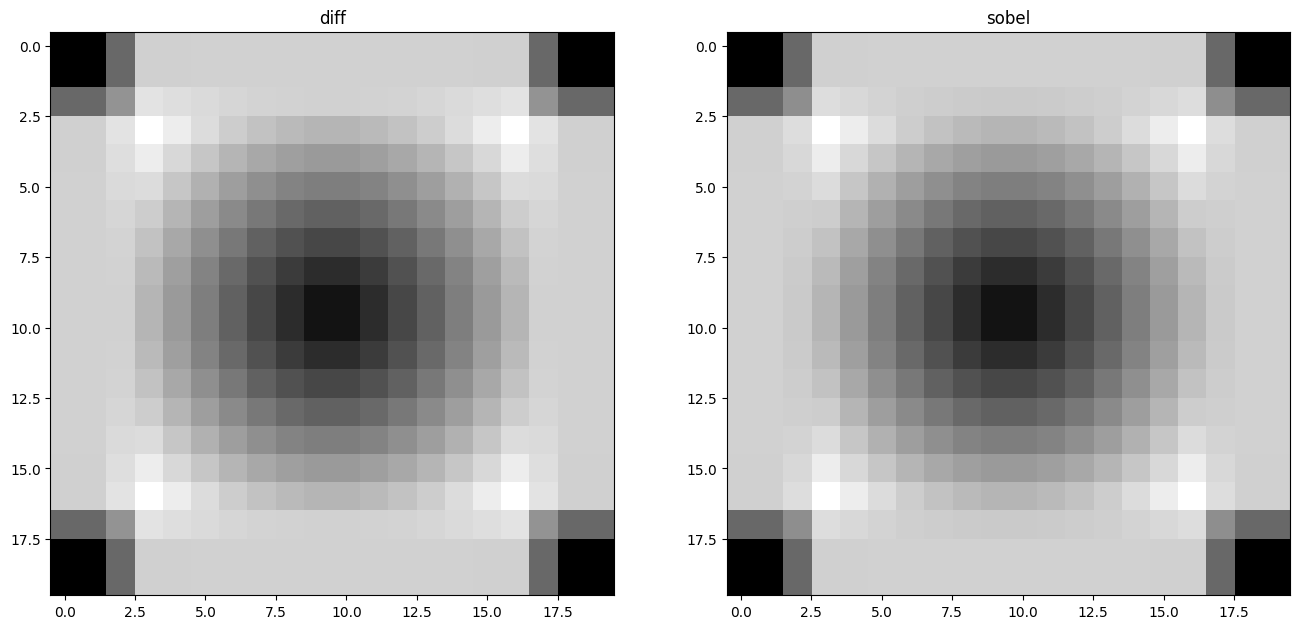

In [67]:
fig = plt.figure(figsize=(16,12))
fig.add_subplot(1,2,1)
plt.imshow(diff_img, cmap='gray')
plt.title("diff")
fig.add_subplot(1,2,2)

plt.imshow(sobel_img, cmap='gray')
plt.title("sobel")



In [68]:
sobel_img[0:10, 0:10]

array([[0.        , 0.        , 0.40776647, 0.81575204, 0.81615664,
        0.81649395, 0.81676391, 0.81696643, 0.81710148, 0.81716901],
       [0.        , 0.        , 0.40776647, 0.81575204, 0.81615664,
        0.81649395, 0.81676391, 0.81696643, 0.81710148, 0.81716901],
       [0.40776647, 0.40776647, 0.55747065, 0.86418398, 0.84378709,
        0.82639466, 0.81220557, 0.80139475, 0.79410378, 0.79043247],
       [0.81575204, 0.81575204, 0.86418398, 1.        , 0.92660811,
        0.86063935, 0.8039474 , 0.75863539, 0.72685085, 0.71042278],
       [0.81615664, 0.81615664, 0.84378709, 0.92660811, 0.8467134 ,
        0.77381282, 0.71009128, 0.65824373, 0.62126907, 0.60192738],
       [0.81649395, 0.81649395, 0.82639466, 0.86063935, 0.77381282,
        0.69314727, 0.62107947, 0.56096102, 0.51700026, 0.49354975],
       [0.81676391, 0.81676391, 0.81220557, 0.8039474 , 0.71009128,
        0.62107947, 0.53935221, 0.46876881, 0.41508239, 0.3854401 ],
       [0.81696643, 0.81696643, 0.8013947

In [69]:
diff_img[0:10, 0:10]

array([[0.        , 0.        , 0.40775805, 0.8157352 , 0.81613979,
        0.8164771 , 0.81674705, 0.81694957, 0.81708461, 0.81715214],
       [0.        , 0.        , 0.40775805, 0.8157352 , 0.81613979,
        0.8164771 , 0.81674705, 0.81694957, 0.81708461, 0.81715214],
       [0.40775805, 0.40775805, 0.57665697, 0.88902013, 0.86923109,
        0.85237915, 0.83864702, 0.8281945 , 0.82115031, 0.81760487],
       [0.8157352 , 0.8157352 , 0.88902013, 1.        , 0.92660811,
        0.86063936, 0.8039474 , 0.75863539, 0.72685085, 0.71042278],
       [0.81613979, 0.81613979, 0.86923109, 0.92660811, 0.84671341,
        0.77381283, 0.71009128, 0.65824374, 0.62126907, 0.60192738],
       [0.8164771 , 0.8164771 , 0.85237915, 0.86063936, 0.77381283,
        0.69314728, 0.62107948, 0.56096103, 0.51700026, 0.49354975],
       [0.81674705, 0.81674705, 0.83864702, 0.8039474 , 0.71009128,
        0.62107948, 0.53935221, 0.46876882, 0.4150824 , 0.38544011],
       [0.81694957, 0.81694957, 0.8281945

## Finding contours!

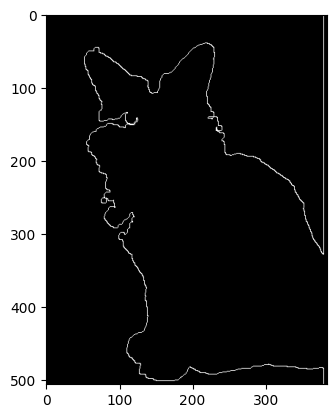

In [117]:
# Find contours
contours = measure.find_contours(sobel_img,0.5)

# Keep only the longest contour (assumes cube is the largest object)
longest_contour = max(contours, key=lambda x: len(x))

# Create a clean outline
outline = np.zeros_like(diff_img)
for coord in longest_contour:
    outline[int(coord[0]), int(coord[1])] = 1

plt.imshow(outline, cmap='gray')

playing around with random custom kernels!
change this to work with rgb... have to handle r,g,b separately and re-combine

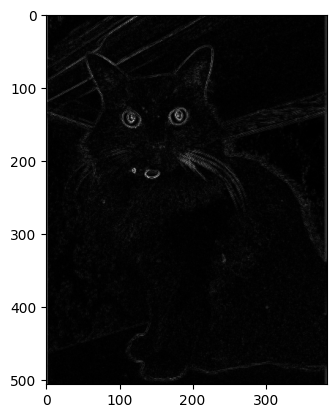

In [122]:
orig_image = plt.imread('chia.png')
orig_image = np.dot(orig_image[...,:3], [1, 0.0, 0.0])
Kx = np.array([[0, 0, 0], [-1, 2, -1], [0, 0, 0]], dtype=np.float32)  # Horizontal
Ky = np.array([[0, -1, 0], [0, 2, 0], [0, -1, 0]], dtype=np.float32)   # Vertical

imgnew, theta = custom_kernel(orig_image, Kx, Ky)
plt.imshow(imgnew, cmap='gray')

Text(0.5, 1.0, 'canny')

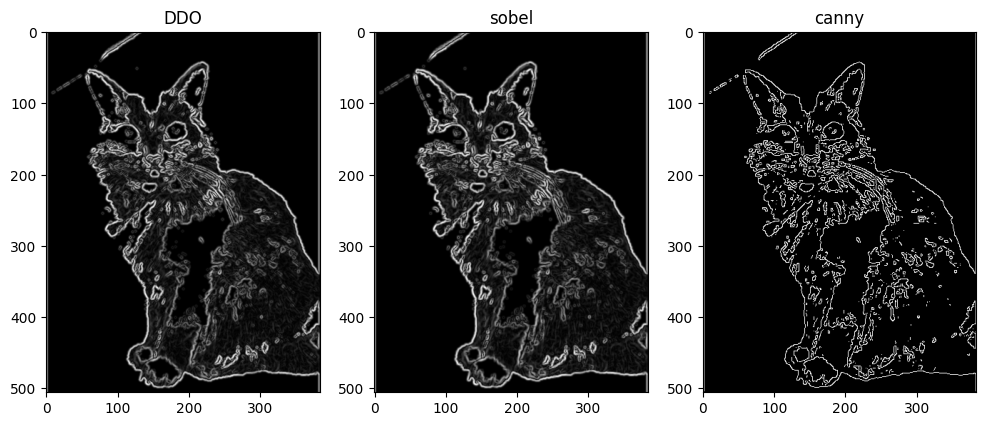

In [124]:
canny_img = plt.imread('canny_edge.png')

fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,3,1)
plt.imshow(diff_img, cmap='gray')
plt.title("DDO")
fig.add_subplot(1,3,2)
plt.imshow(sobel_img, cmap='gray')
plt.title("sobel")
fig.add_subplot(1,3,3)
plt.imshow(canny_img, cmap='gray')
plt.title("canny")